## Carga y balanceo de datos

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Ruta al archivo CSV
ruta = r"C:\Users\USUARIO\Documents\PORTAFOLIO\RiesgoCrediticio_XAI\data\dataset_transformado.csv"

# Leer el dataset
df = pd.read_csv(ruta)

df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_Otros,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade,loan_status
0,-1.359495,0.146425,0.290655,2.536826,1.542584,2.369138,-0.707592,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1
1,-1.830518,-2.759719,0.353305,-2.397391,0.099330,-0.619260,-1.446108,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0
2,-0.265733,-2.759719,-1.075468,-0.538105,0.636834,2.321462,-0.707592,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1
3,-0.947703,0.377641,0.070670,2.536826,1.323138,2.216757,-1.446108,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1
4,-0.585668,-0.027329,1.060970,2.536826,1.049828,2.270747,-0.203457,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1


In [17]:

# Separar características y target
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

# División en train/validación
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=21, stratify=y
)

In [18]:
from imblearn.over_sampling import SMOTE

# Inicializamos el método SMOTE para tratar el desbalance de clases
smote = SMOTE(random_state=21)

# Aplicamos SMOTE al conjunto de entrenamiento
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Reportamos los tamaños antes y después del balanceo
print(f"Conjunto de entrenamiento original: {X_train.shape[0]} muestras")
print(f"Conjunto de entrenamiento balanceado: {X_train_balanced.shape[0]} muestras")

# Reportamos la distribución de clases
print("Distribución de clases antes del balanceo:")
print(y_train.value_counts())

print("\nDistribución de clases después del balanceo:")
print(y_train_balanced.value_counts())

Conjunto de entrenamiento original: 25932 muestras
Conjunto de entrenamiento balanceado: 40522 muestras
Distribución de clases antes del balanceo:
loan_status
0    20261
1     5671
Name: count, dtype: int64

Distribución de clases después del balanceo:
loan_status
0    20261
1    20261
Name: count, dtype: int64


## Modelamiento y tuneo de hiperparametros

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score
import pandas as pd

# Modelos base
modelo_lr_base = LogisticRegression(max_iter=1000, random_state=42)
modelo_rf_base = RandomForestClassifier(random_state=42)
modelo_xgb_base = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
modelo_lgbm_base = LGBMClassifier(random_state=42)

modelos_base = {
    "Regresión Logística": modelo_lr_base,
    "Random Forest": modelo_rf_base,
    "XGBoost": modelo_xgb_base,
    "LightGBM": modelo_lgbm_base
}

# Lista para almacenar resultados
resultados = []

# Entrenamiento y evaluación
for nombre, modelo in modelos_base.items():
    modelo.fit(X_train_balanced, y_train_balanced)
    y_pred = modelo.predict(X_val)
    y_proba = modelo.predict_proba(X_val)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "ROC AUC": round(roc_auc_score(y_val, y_proba), 4),
        "F1 Score": round(f1_score(y_val, y_pred), 4),
        "Recall Clase 1": round(recall_score(y_val, y_pred), 4)
    })

c:\Users\USUARIO\anaconda3\envs\pycaret-env\lib\site-packages\xgboost\training.py:199: UserWarning: [14:11:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 20261, number of negative: 20261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005254 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4678
[LightGBM] [Info] Number of data points in the train set: 40522, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [20]:
df_resultados = pd.DataFrame(resultados)

# Mostrar tabla
print("Tabla Comparativa de Modelos:")
df_resultados

Tabla Comparativa de Modelos:


,Modelo,ROC AUC,F1 Score,Recall Clase 1
0,Regresión Logística,0.8652,0.6128,0.7891
1,Random Forest,0.9268,0.8130,0.7158
2,XGBoost,0.9432,0.8221,0.7236
3,LightGBM,0.9396,0.8239,0.7144


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score
from sklearn.model_selection import GridSearchCV
import pandas as pd

# Diccionario de modelos y sus grids de hiperparámetros
modelos_con_parametros = {
    "Regresión Logística": {
        "modelo": LogisticRegression(max_iter=1000, random_state=42),
        "param_grid": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Random Forest": {
        "modelo": RandomForestClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "max_depth": [None, 10, 20]
        }
    },
    "XGBoost": {
        "modelo": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "param_grid": {
            "n_estimators": [200, 300],       
            "max_depth": [4, 6],             
            "learning_rate": [0.05, 0.1],    
            "subsample": [0.8],              
            "colsample_bytree": [0.8]        
        },
        "n_jobs": 1
    },
    "LightGBM": {
        "modelo": LGBMClassifier(random_state=42),
        "param_grid": {
            "n_estimators": [100, 200],
            "num_leaves": [31, 50],
            "learning_rate": [0.01, 0.1]
        }
    }
}

# Listas para resultados y modelos
resultados = []
mejores_modelos = {}

# Entrenamiento y evaluación
for nombre, contenido in modelos_con_parametros.items():
    modelo = contenido["modelo"]
    param_grid = contenido["param_grid"]
    n_jobs = contenido.get("n_jobs", -1)

    grid = GridSearchCV(modelo, param_grid, scoring="roc_auc", cv=3, n_jobs=n_jobs)
    grid.fit(X_train_balanced, y_train_balanced)

    mejor_modelo = grid.best_estimator_
    mejores_modelos[nombre] = mejor_modelo  # Guardar el modelo ajustado

    y_pred = mejor_modelo.predict(X_val)
    y_proba = mejor_modelo.predict_proba(X_val)[:, 1]

    resultados.append({
        "Modelo": nombre,
        "ROC AUC": round(roc_auc_score(y_val, y_proba), 4),
        "F1 Score": round(f1_score(y_val, y_pred), 4),
        "Recall Clase 1": round(recall_score(y_val, y_pred), 4),
        "Mejores Hiperparámetros": grid.best_params_
    })

c:\Users\USUARIO\anaconda3\envs\pycaret-env\lib\site-packages\xgboost\training.py:199: UserWarning: [14:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USUARIO\anaconda3\envs\pycaret-env\lib\site-packages\xgboost\training.py:199: UserWarning: [14:14:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USUARIO\anaconda3\envs\pycaret-env\lib\site-packages\xgboost\training.py:199: UserWarning: [14:14:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\USUARIO\anaconda3\envs\pycaret-env\lib\site-packages\xgboost\training.py:199: UserWarning: [14:14:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

[LightGBM] [Info] Number of positive: 20261, number of negative: 20261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4678
[LightGBM] [Info] Number of data points in the train set: 40522, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


## Mejor modelo con mejores resultados

In [22]:
# Mostrar tabla
df_resultados_tuned = pd.DataFrame(resultados)

print("📊 Tabla Comparativa de Modelos con Mejores Hiperparámetros:")
df_resultados_tuned

📊 Tabla Comparativa de Modelos con Mejores Hiperparámetros:


,Modelo,ROC AUC,F1 Score,Recall Clase 1,Mejores Hiperparámetros
0,Regresión Logística,0.8652,0.6131,0.7913,"{'C': 0.1, 'solver': 'liblinear'}"
1,Random Forest,0.9278,0.8145,0.7186,"{'max_depth': None, 'n_estimators': 200}"
2,XGBoost,0.9449,0.8272,0.7243,"{'colsample_bytree': 0.8, 'learning_rate': 0.1..."
3,LightGBM,0.9449,0.8295,0.7257,"{'learning_rate': 0.1, 'n_estimators': 200, 'n..."


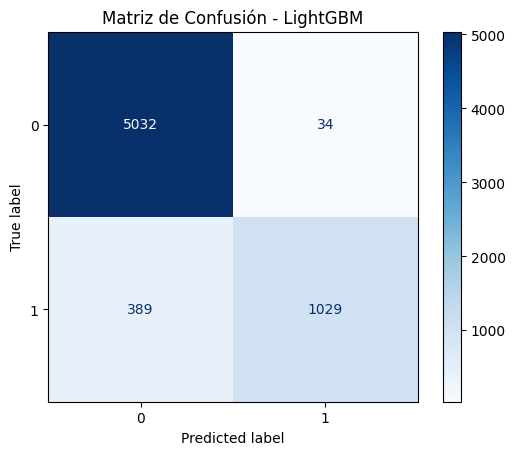

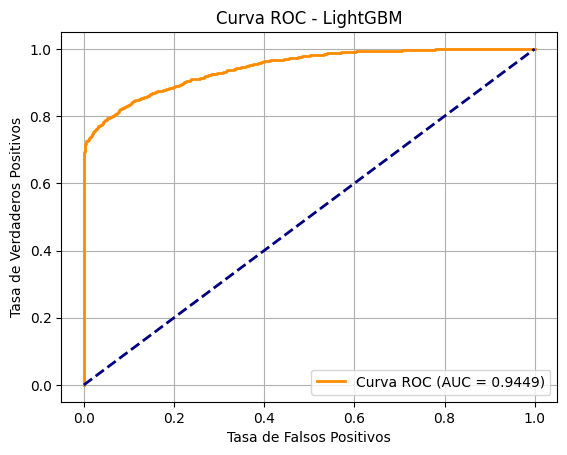

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Modelo ganador (LightGBM tuneado)
modelo_final = mejores_modelos["LightGBM"]

y_pred_lgbm = modelo_final.predict(X_val)
y_proba_lgbm = modelo_final.predict_proba(X_val)[:, 1]

cm = confusion_matrix(y_val, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - LightGBM")
plt.show()

fpr, tpr, _ = roc_curve(y_val, y_proba_lgbm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - LightGBM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# Guardar el modelo tuneado
import joblib
joblib.dump(mejores_modelos["LightGBM"], "../models/lightgbm_tuneado.pkl")

['../models/lightgbm_tuneado.pkl']